## Convolutional Neural Network Implementation in PyTorch

In [1]:
import os
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
REBUILD_DATA = False

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "../datasets/PetImages/Cat"
    DOGS = "../datasets/PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0
    TRAINING_DATA_PATH = "../datasets/training_data.npy"

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])


                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1

                except Exception as e:
                    pass


        np.random.shuffle(self.training_data)
        np.save("training.npy", self.training_data)
        print("Cats: ", self.catcount)
        print("Dogs: ", self.dogcount)


if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

../datasets/PetImages/Cat


  0%|          | 0/25002 [00:00<?, ?it/s]

100%|██████████| 25002/25002 [00:27<00:00, 914.31it/s]


../datasets/PetImages/Dog


100%|██████████| 25002/25002 [00:31<00:00, 796.78it/s]


Cats:  12476
Dogs:  12470


In [5]:
training_data = np.load("training.npy", allow_pickle=True)

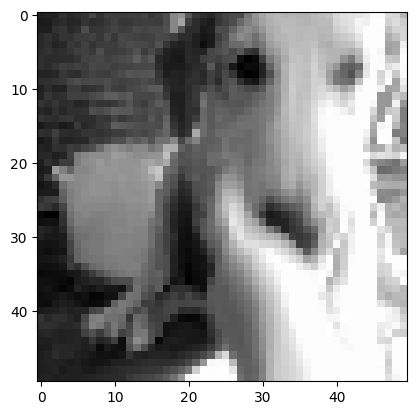

In [7]:
plt.imshow(training_data[0][0], cmap="gray")
plt.show()

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F 

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(50, 50).view(-1, 1, 50, 50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)

    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

        print(x[0].shape)
        if self._to_linear == None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=1)
        return x

net = Net()

torch.Size([128, 2, 2])


In [35]:
import torch.optim as optim


optimizer = optim.Adam(net.parameters(), lr=0.001)

loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])


VAL_PCT = 0.1

val_size = int(len(X)*VAL_PCT)
print(val_size)

2494


In [36]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

In [37]:
train_X.shape

torch.Size([22452, 50, 50])

In [40]:
BATCH_SIZE = 100
EPOCHS = 2

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
        # print("Batch: ", batch_X.shape)
        batch_y = train_y[i:i+BATCH_SIZE]
        net.zero_grad()
        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()


print(loss)

  0%|          | 0/225 [00:00<?, ?it/s]

torch.Size([128, 2, 2])


  0%|          | 1/225 [00:00<01:23,  2.70it/s]

torch.Size([128, 2, 2])


  1%|          | 2/225 [00:00<01:17,  2.89it/s]

torch.Size([128, 2, 2])


  1%|▏         | 3/225 [00:01<01:16,  2.90it/s]

torch.Size([128, 2, 2])


  2%|▏         | 4/225 [00:01<01:16,  2.88it/s]

torch.Size([128, 2, 2])


  2%|▏         | 5/225 [00:01<01:24,  2.60it/s]

torch.Size([128, 2, 2])


  3%|▎         | 6/225 [00:02<01:21,  2.69it/s]

torch.Size([128, 2, 2])


  3%|▎         | 7/225 [00:02<01:20,  2.72it/s]

torch.Size([128, 2, 2])


  4%|▎         | 8/225 [00:02<01:19,  2.75it/s]

torch.Size([128, 2, 2])


  4%|▍         | 9/225 [00:03<01:17,  2.80it/s]

torch.Size([128, 2, 2])


  4%|▍         | 10/225 [00:03<01:14,  2.88it/s]

torch.Size([128, 2, 2])


  5%|▍         | 11/225 [00:03<01:16,  2.80it/s]

torch.Size([128, 2, 2])


  5%|▌         | 12/225 [00:04<01:18,  2.71it/s]

torch.Size([128, 2, 2])


  6%|▌         | 13/225 [00:04<01:16,  2.76it/s]

torch.Size([128, 2, 2])


  6%|▌         | 14/225 [00:05<01:14,  2.84it/s]

torch.Size([128, 2, 2])


  7%|▋         | 15/225 [00:05<01:13,  2.86it/s]

torch.Size([128, 2, 2])


  7%|▋         | 16/225 [00:05<01:13,  2.86it/s]

torch.Size([128, 2, 2])


  8%|▊         | 17/225 [00:06<01:12,  2.87it/s]

torch.Size([128, 2, 2])


  8%|▊         | 18/225 [00:06<01:10,  2.95it/s]

torch.Size([128, 2, 2])


  9%|▉         | 20/225 [00:07<01:07,  3.03it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  9%|▉         | 21/225 [00:07<01:06,  3.05it/s]

torch.Size([128, 2, 2])


 10%|▉         | 22/225 [00:07<01:08,  2.95it/s]

torch.Size([128, 2, 2])


 10%|█         | 23/225 [00:08<01:08,  2.95it/s]

torch.Size([128, 2, 2])


 11%|█         | 24/225 [00:08<01:08,  2.95it/s]

torch.Size([128, 2, 2])


 11%|█         | 25/225 [00:08<01:08,  2.91it/s]

torch.Size([128, 2, 2])


 12%|█▏        | 26/225 [00:09<01:07,  2.96it/s]

torch.Size([128, 2, 2])


 12%|█▏        | 27/225 [00:09<01:07,  2.91it/s]

torch.Size([128, 2, 2])


 12%|█▏        | 28/225 [00:09<01:07,  2.93it/s]

torch.Size([128, 2, 2])


 13%|█▎        | 29/225 [00:10<01:06,  2.94it/s]

torch.Size([128, 2, 2])


 13%|█▎        | 30/225 [00:10<01:06,  2.94it/s]

torch.Size([128, 2, 2])


 14%|█▍        | 31/225 [00:10<01:06,  2.94it/s]

torch.Size([128, 2, 2])


 14%|█▍        | 32/225 [00:11<01:06,  2.90it/s]

torch.Size([128, 2, 2])


 15%|█▍        | 33/225 [00:11<01:05,  2.92it/s]

torch.Size([128, 2, 2])


 15%|█▌        | 34/225 [00:11<01:05,  2.90it/s]

torch.Size([128, 2, 2])


 16%|█▌        | 35/225 [00:12<01:06,  2.87it/s]

torch.Size([128, 2, 2])


 16%|█▌        | 36/225 [00:12<01:09,  2.73it/s]

torch.Size([128, 2, 2])


 16%|█▋        | 37/225 [00:13<01:19,  2.37it/s]

torch.Size([128, 2, 2])


 17%|█▋        | 38/225 [00:13<01:17,  2.41it/s]

torch.Size([128, 2, 2])


 17%|█▋        | 39/225 [00:13<01:15,  2.47it/s]

torch.Size([128, 2, 2])


 18%|█▊        | 40/225 [00:14<01:17,  2.38it/s]

torch.Size([128, 2, 2])


 18%|█▊        | 41/225 [00:14<01:15,  2.45it/s]

torch.Size([128, 2, 2])


 19%|█▊        | 42/225 [00:15<01:13,  2.50it/s]

torch.Size([128, 2, 2])


 19%|█▉        | 43/225 [00:15<01:09,  2.62it/s]

torch.Size([128, 2, 2])


 20%|█▉        | 44/225 [00:15<01:07,  2.70it/s]

torch.Size([128, 2, 2])


 20%|██        | 45/225 [00:16<01:05,  2.74it/s]

torch.Size([128, 2, 2])


 20%|██        | 46/225 [00:16<01:05,  2.75it/s]

torch.Size([128, 2, 2])


 21%|██        | 47/225 [00:16<01:09,  2.56it/s]

torch.Size([128, 2, 2])


 21%|██▏       | 48/225 [00:17<01:07,  2.64it/s]

torch.Size([128, 2, 2])


 22%|██▏       | 49/225 [00:17<01:05,  2.69it/s]

torch.Size([128, 2, 2])


 22%|██▏       | 50/225 [00:18<01:04,  2.72it/s]

torch.Size([128, 2, 2])


 23%|██▎       | 51/225 [00:18<01:02,  2.78it/s]

torch.Size([128, 2, 2])


 23%|██▎       | 52/225 [00:18<01:02,  2.78it/s]

torch.Size([128, 2, 2])


 24%|██▎       | 53/225 [00:19<01:01,  2.80it/s]

torch.Size([128, 2, 2])


 24%|██▍       | 54/225 [00:19<01:00,  2.82it/s]

torch.Size([128, 2, 2])


 25%|██▍       | 56/225 [00:20<00:57,  2.96it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 25%|██▌       | 57/225 [00:20<00:57,  2.93it/s]

torch.Size([128, 2, 2])


 26%|██▌       | 58/225 [00:20<00:56,  2.93it/s]

torch.Size([128, 2, 2])


 26%|██▌       | 59/225 [00:21<00:57,  2.91it/s]

torch.Size([128, 2, 2])


 27%|██▋       | 60/225 [00:21<01:01,  2.70it/s]

torch.Size([128, 2, 2])


 27%|██▋       | 61/225 [00:21<00:59,  2.77it/s]

torch.Size([128, 2, 2])


 28%|██▊       | 62/225 [00:22<00:57,  2.81it/s]

torch.Size([128, 2, 2])


 28%|██▊       | 63/225 [00:22<00:56,  2.88it/s]

torch.Size([128, 2, 2])


 28%|██▊       | 64/225 [00:22<00:55,  2.90it/s]

torch.Size([128, 2, 2])


 29%|██▉       | 65/225 [00:23<00:56,  2.85it/s]

torch.Size([128, 2, 2])


 29%|██▉       | 66/225 [00:23<00:55,  2.88it/s]

torch.Size([128, 2, 2])


 30%|██▉       | 67/225 [00:23<00:54,  2.89it/s]

torch.Size([128, 2, 2])


 30%|███       | 68/225 [00:24<00:54,  2.90it/s]

torch.Size([128, 2, 2])


 31%|███       | 69/225 [00:24<00:53,  2.91it/s]

torch.Size([128, 2, 2])


 31%|███       | 70/225 [00:24<00:53,  2.89it/s]

torch.Size([128, 2, 2])


 32%|███▏      | 71/225 [00:25<00:53,  2.88it/s]

torch.Size([128, 2, 2])


 32%|███▏      | 72/225 [00:25<00:53,  2.86it/s]

torch.Size([128, 2, 2])


 32%|███▏      | 73/225 [00:26<00:53,  2.86it/s]

torch.Size([128, 2, 2])


 33%|███▎      | 74/225 [00:26<00:52,  2.89it/s]

torch.Size([128, 2, 2])


 33%|███▎      | 75/225 [00:26<00:52,  2.87it/s]

torch.Size([128, 2, 2])


 34%|███▍      | 76/225 [00:27<00:51,  2.88it/s]

torch.Size([128, 2, 2])


 34%|███▍      | 77/225 [00:27<00:51,  2.89it/s]

torch.Size([128, 2, 2])


 35%|███▍      | 78/225 [00:27<00:50,  2.93it/s]

torch.Size([128, 2, 2])


 35%|███▌      | 79/225 [00:28<00:48,  2.98it/s]

torch.Size([128, 2, 2])


 36%|███▌      | 80/225 [00:28<00:48,  2.96it/s]

torch.Size([128, 2, 2])


 36%|███▌      | 81/225 [00:28<00:51,  2.79it/s]

torch.Size([128, 2, 2])


 37%|███▋      | 83/225 [00:29<00:48,  2.94it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 37%|███▋      | 84/225 [00:29<00:48,  2.90it/s]

torch.Size([128, 2, 2])


 38%|███▊      | 85/225 [00:30<00:47,  2.92it/s]

torch.Size([128, 2, 2])


 38%|███▊      | 86/225 [00:30<00:47,  2.91it/s]

torch.Size([128, 2, 2])


 39%|███▊      | 87/225 [00:30<00:47,  2.89it/s]

torch.Size([128, 2, 2])


 39%|███▉      | 88/225 [00:31<00:48,  2.85it/s]

torch.Size([128, 2, 2])


 40%|███▉      | 89/225 [00:31<00:47,  2.84it/s]

torch.Size([128, 2, 2])


 40%|████      | 90/225 [00:31<00:47,  2.86it/s]

torch.Size([128, 2, 2])


 40%|████      | 91/225 [00:32<00:49,  2.70it/s]

torch.Size([128, 2, 2])


 41%|████      | 92/225 [00:32<00:48,  2.74it/s]

torch.Size([128, 2, 2])


 41%|████▏     | 93/225 [00:33<00:46,  2.82it/s]

torch.Size([128, 2, 2])


 42%|████▏     | 94/225 [00:33<00:46,  2.83it/s]

torch.Size([128, 2, 2])


 42%|████▏     | 95/225 [00:33<00:46,  2.80it/s]

torch.Size([128, 2, 2])


 43%|████▎     | 96/225 [00:34<00:47,  2.73it/s]

torch.Size([128, 2, 2])


 43%|████▎     | 97/225 [00:34<00:47,  2.69it/s]

torch.Size([128, 2, 2])


 44%|████▎     | 98/225 [00:34<00:47,  2.70it/s]

torch.Size([128, 2, 2])


 44%|████▍     | 99/225 [00:35<00:45,  2.78it/s]

torch.Size([128, 2, 2])


 44%|████▍     | 100/225 [00:35<00:44,  2.80it/s]

torch.Size([128, 2, 2])


 45%|████▍     | 101/225 [00:35<00:44,  2.81it/s]

torch.Size([128, 2, 2])


 45%|████▌     | 102/225 [00:36<00:43,  2.83it/s]

torch.Size([128, 2, 2])


 46%|████▌     | 103/225 [00:36<00:42,  2.84it/s]

torch.Size([128, 2, 2])


 46%|████▌     | 104/225 [00:36<00:42,  2.87it/s]

torch.Size([128, 2, 2])


 47%|████▋     | 105/225 [00:37<00:41,  2.90it/s]

torch.Size([128, 2, 2])


 47%|████▋     | 106/225 [00:37<00:41,  2.87it/s]

torch.Size([128, 2, 2])


 48%|████▊     | 107/225 [00:38<00:43,  2.68it/s]

torch.Size([128, 2, 2])


 48%|████▊     | 108/225 [00:38<00:42,  2.73it/s]

torch.Size([128, 2, 2])


 48%|████▊     | 109/225 [00:38<00:44,  2.63it/s]

torch.Size([128, 2, 2])


 49%|████▉     | 110/225 [00:39<00:43,  2.64it/s]

torch.Size([128, 2, 2])


 50%|████▉     | 112/225 [00:39<00:41,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 50%|█████     | 113/225 [00:40<00:40,  2.79it/s]

torch.Size([128, 2, 2])


 51%|█████     | 114/225 [00:40<00:39,  2.80it/s]

torch.Size([128, 2, 2])


 51%|█████     | 115/225 [00:41<00:42,  2.61it/s]

torch.Size([128, 2, 2])


 52%|█████▏    | 116/225 [00:41<00:40,  2.68it/s]

torch.Size([128, 2, 2])


 52%|█████▏    | 117/225 [00:41<00:39,  2.74it/s]

torch.Size([128, 2, 2])


 52%|█████▏    | 118/225 [00:42<00:38,  2.80it/s]

torch.Size([128, 2, 2])


 53%|█████▎    | 119/225 [00:42<00:38,  2.77it/s]

torch.Size([128, 2, 2])


 53%|█████▎    | 120/225 [00:42<00:37,  2.79it/s]

torch.Size([128, 2, 2])


 54%|█████▍    | 121/225 [00:43<00:37,  2.77it/s]

torch.Size([128, 2, 2])


 54%|█████▍    | 122/225 [00:43<00:41,  2.46it/s]

torch.Size([128, 2, 2])


 55%|█████▍    | 123/225 [00:44<00:45,  2.26it/s]

torch.Size([128, 2, 2])


 55%|█████▌    | 124/225 [00:44<00:44,  2.26it/s]

torch.Size([128, 2, 2])


 56%|█████▌    | 125/225 [00:45<00:41,  2.40it/s]

torch.Size([128, 2, 2])


 56%|█████▌    | 126/225 [00:45<00:39,  2.49it/s]

torch.Size([128, 2, 2])


 56%|█████▋    | 127/225 [00:45<00:38,  2.56it/s]

torch.Size([128, 2, 2])


 57%|█████▋    | 128/225 [00:46<00:36,  2.68it/s]

torch.Size([128, 2, 2])


 57%|█████▋    | 129/225 [00:46<00:35,  2.70it/s]

torch.Size([128, 2, 2])


 58%|█████▊    | 130/225 [00:46<00:35,  2.71it/s]

torch.Size([128, 2, 2])


 58%|█████▊    | 131/225 [00:47<00:34,  2.73it/s]

torch.Size([128, 2, 2])


 59%|█████▊    | 132/225 [00:47<00:34,  2.70it/s]

torch.Size([128, 2, 2])


 59%|█████▉    | 133/225 [00:47<00:34,  2.66it/s]

torch.Size([128, 2, 2])


 60%|█████▉    | 134/225 [00:48<00:33,  2.68it/s]

torch.Size([128, 2, 2])


 60%|██████    | 135/225 [00:48<00:36,  2.44it/s]

torch.Size([128, 2, 2])


 60%|██████    | 136/225 [00:49<00:35,  2.51it/s]

torch.Size([128, 2, 2])


 61%|██████    | 137/225 [00:49<00:33,  2.60it/s]

torch.Size([128, 2, 2])


 61%|██████    | 137/225 [00:49<00:32,  2.75it/s]


KeyboardInterrupt: 